# Mushroom Classification Project
by Gabriela Tijerina

In [7]:
#Imports 
import numpy as np 
import pandas as pd


#Visualize
import matplotlib.pyplot as plt
import seaborn as sns 
import graphviz
from graphviz import Graph

#Turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# .py modules to acquire and prep the data
#import acquire
#import prepare

#Hypothesis tests for data exploration
from scipy.stats import chi2_contingency
import scipy


#Train, validate, test
from sklearn.model_selection import train_test_split

# evaluating models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

#Creating models for classification ML:
#Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression



# Acquire

In [8]:
# Acquire dataset
df = acquire.get_mushroom_data()

In [9]:
df.columns.to_list()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [10]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
#Shape of dataset
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [13]:
df['class'].unique()


array(['p', 'e'], dtype=object)

In [14]:
df['class'].value_counts()


e    4208
p    3916
Name: class, dtype: int64

# Prepare
#### In this step:

- removed 'veil-type' column
- encoded data
- split data into train, validate, test. 

In [15]:
df_na = df.replace("?", np.nan)

In [16]:
# Find rows and columns that contain a NaN value
narows = df_na[df_na.isnull().any(axis=1)]
nacols = df_na.columns[df_na.isna().any()].tolist()

# Calculate the percentage of rows and columns that contain a NaN value
percent_narows = round(len(narows)/df_na.shape[0]*100, 1)
percent_nacols = round(len(nacols)/df_na.shape[1]*100, 1)

print("There are {} row(s) ({}%) with NaN values.".format(len(narows), percent_narows))
print("There are {} column(s) ({}%) with NaN values.".format(len(nacols), percent_nacols))

There are 2480 row(s) (30.5%) with NaN values.
There are 1 column(s) (4.3%) with NaN values.


In [17]:
#Veil-type only has one value.
df_na['veil-type']

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: object

In [18]:
#Dropping veil-type column 
df = df.drop(["veil-type"],axis=1)


### Encode Data

In [21]:
#import
from sklearn.preprocessing import LabelEncoder

#Converting labels to numerical data
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

### Split Data 

In [22]:
def split_data(df, stratify_by=None):
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(train, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train[stratify_by])
    return train, validate, test

In [23]:
train, validate, test = split_data(df, stratify_by = 'class')

In [24]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (4549, 22)
validate -> (1950, 22)
test -> (1625, 22)


# Exploratory Data Analysis

## Visual Exploration

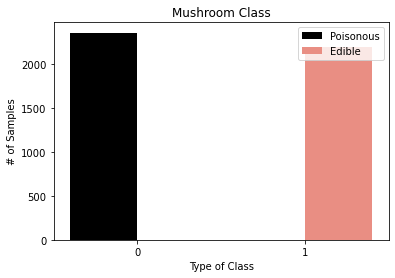

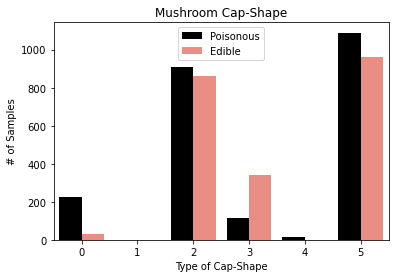

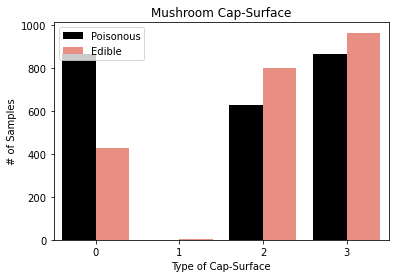

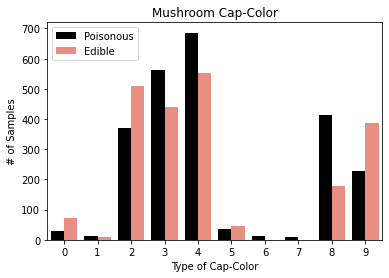

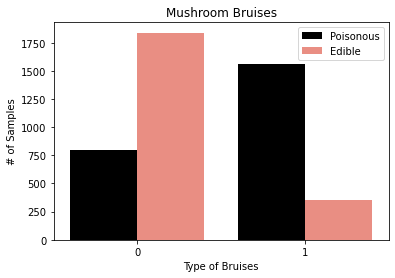

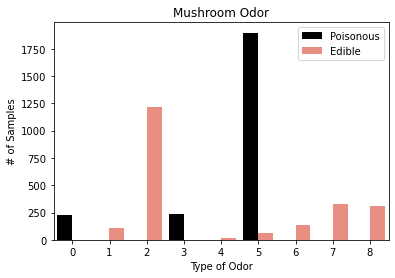

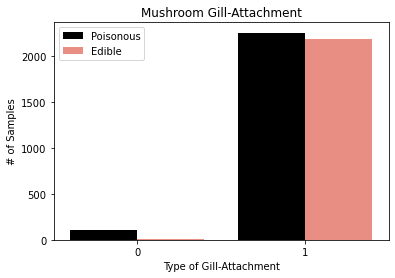

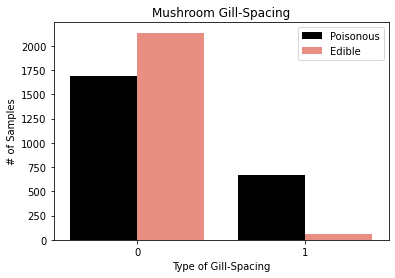

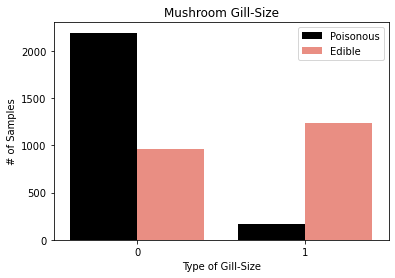

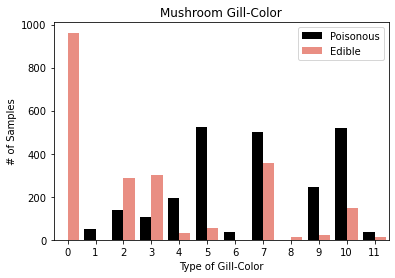

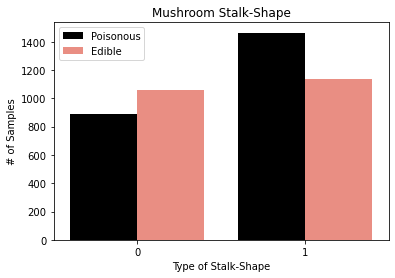

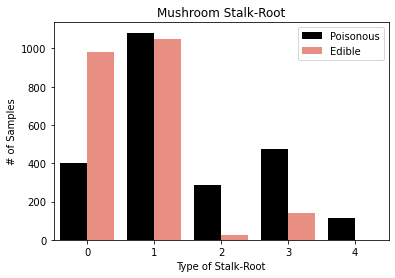

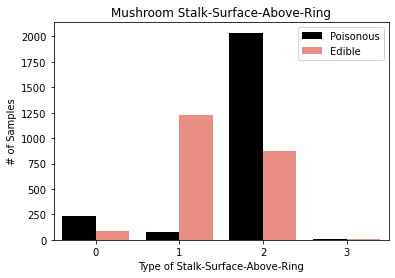

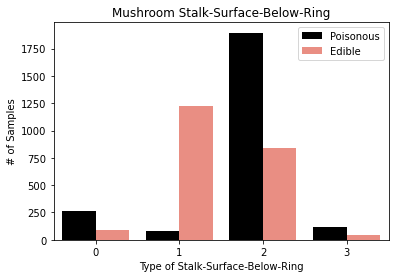

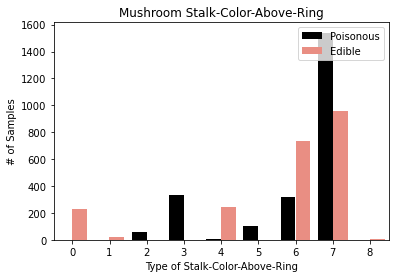

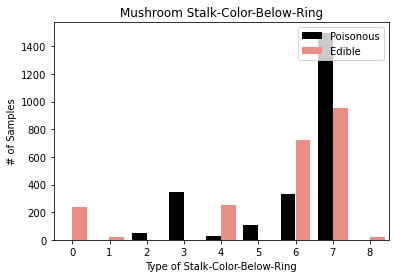

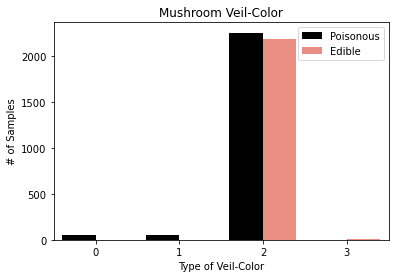

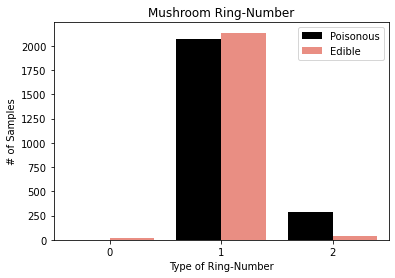

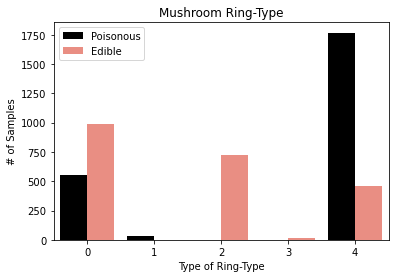

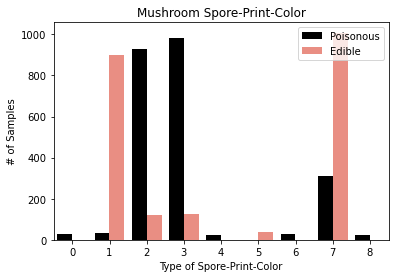

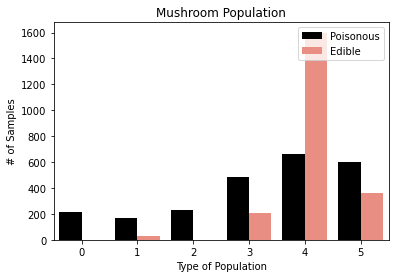

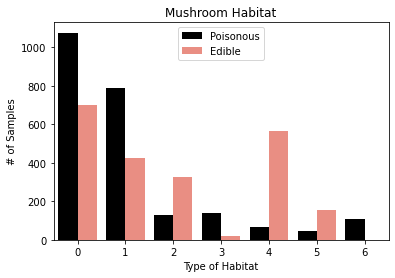

In [25]:
for col in train:
    fig,ax = plt.subplots()
    sns.countplot(col,hue=train['class'],palette=['black','salmon'],data=train)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])

## Data Exploration with Statistical Testing

Data is categorical, so I will be using a chi squared test to compare independence between A (target variable "class") and B (features).


$H_0$:
  A and B are independent.
  
$H_a$:
  A and B are dependent.

In [26]:
# Define alpha
alpha = 0.05

for col in df.columns.values:

    A, B = train[col], train["class"]

    dfObserved = pd.crosstab(A, B) 
    chi2, p, dof, expected = scipy.stats.chi2_contingency(dfObserved.values)

    if p < alpha:
        # Reject null hypothesis
        print("{} is important. (p = {})".format(col, p))
    else:
        # Fail to reject null hypothesis
        print("{} is NOT important. (p = {})".format(col, p))

class is important. (p = 0.0)
cap-shape is important. (p = 2.6255235673949132e-59)
cap-surface is important. (p = 9.492712809324074e-37)
cap-color is important. (p = 2.2498020131868458e-42)
bruises is important. (p = 1.2574581329980818e-255)
odor is important. (p = 0.0)
gill-attachment is important. (p = 6.192106624146265e-17)
gill-spacing is important. (p = 2.9780074727472444e-122)
gill-size is important. (p = 5.440958993667576e-285)
gill-color is important. (p = 0.0)
stalk-shape is important. (p = 1.528999125400454e-12)
stalk-root is important. (p = 8.578269176261531e-161)
stalk-surface-above-ring is important. (p = 0.0)
stalk-surface-below-ring is important. (p = 0.0)
stalk-color-above-ring is important. (p = 3.7957667056611526e-267)
stalk-color-below-ring is important. (p = 2.9922937446590923e-253)
veil-color is important. (p = 7.144586420283477e-23)
ring-number is important. (p = 7.821521923749167e-45)
ring-type is important. (p = 0.0)
spore-print-color is important. (p = 0.0)
pop

## Cramér's V 

Also using Cramér's V to measure association between categorical variables with 0 meaning no association and 1 is full association. 

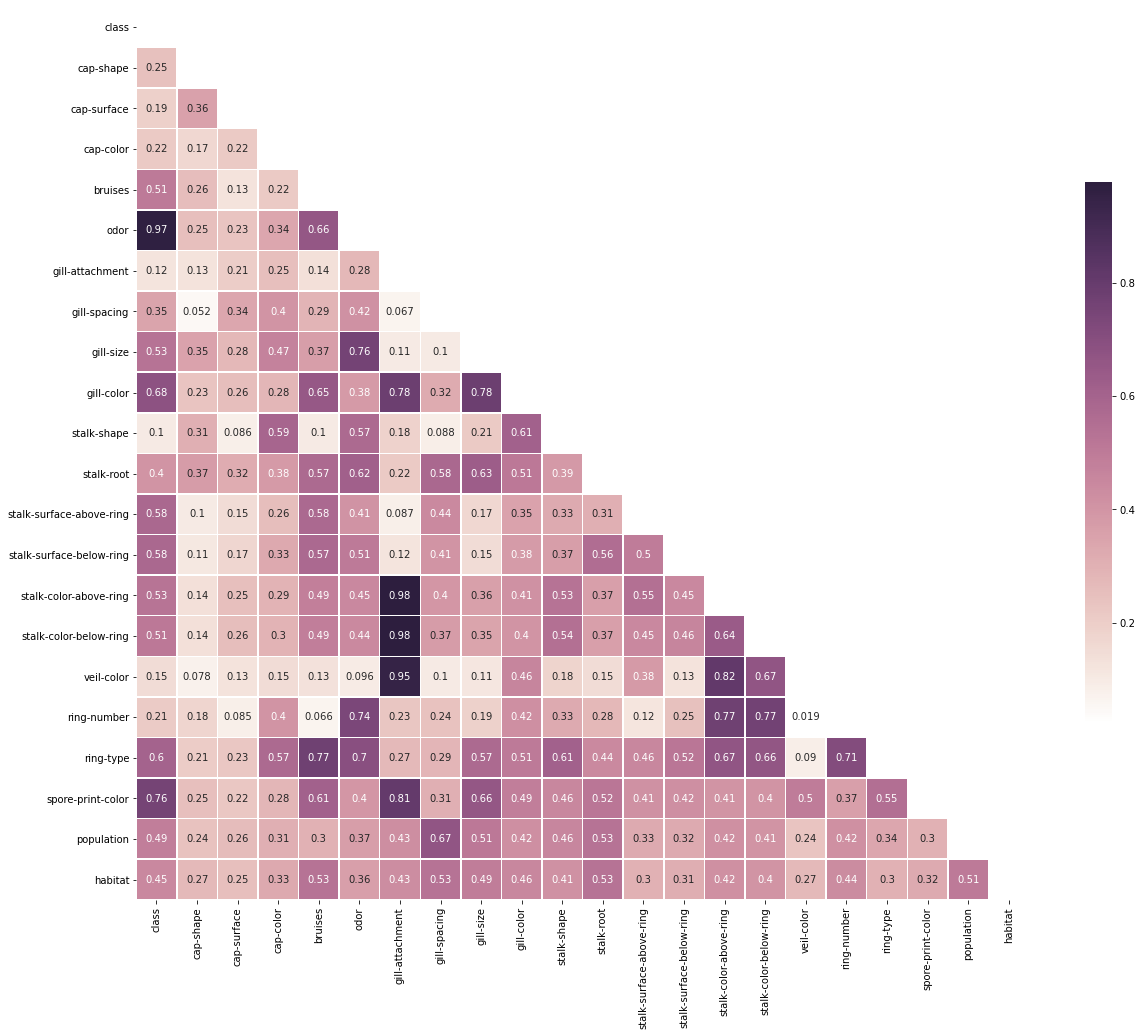

In [30]:
import itertools

def cramers_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer'v V statistic
    """
    
    chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(train.columns.values)
corrM = np.zeros((len(cols),len(cols)))

# Calculate correlations of every combination of variables
for col1, col2 in itertools.combinations(cols, 2):

    A, B = train[col1], train[col2]
    
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(A,B) 
    corrM[idx1, idx2] = cramers_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Takeaways: 
- All features seem to have some kind of significance or association. 
- Odor, spore-print-color, ring-type, gill-color, have strong association with class. 
- Odor has strongest association with class. 

# Modeling and Evaluation

### Set up X inputs and y target variable for each split

In [31]:
#Train
X_train = train.drop(columns=['class'])
y_train = train['class']

#Validate
X_validate = validate.drop(columns=['class'])
y_validate = validate['class']

#Test
X_test = test.drop(columns=['class'])
y_test = test['class']


## Baseline Accuracy 

In [32]:
#Model would predict 0 (ediblble)
y_train.value_counts()

0    2356
1    2193
Name: class, dtype: int64

In [33]:
baseline_accuracy = (train['class'] == 0).mean()
print(f'baseline accuracy: {baseline_accuracy: .2}')

baseline accuracy:  0.52


## Decision Tree

In [34]:
#create 1st Decision Tree model (specifying max_depth argument to avoid overfitting, all features) and compare to baseline
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model
clf1.fit(X_train, y_train)

#get predictions from model
y_pred = clf1.predict(X_train)

#compare to baseline
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Decision Tree classifier on training set: {:.2f}'
     .format(clf1.score(X_train, y_train)))

----------------
Model trained on all features:
Accuracy of 1st Decision Tree classifier on training set: 0.96


## Random Forest

In [35]:
 #create 1st random forest model (specifying max_depth and min_samples_leaf parameters to avoid overfitting, all features) and compare to baseline
rf1 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)

#fit model
rf1 = rf1.fit(X_train, y_train)

#get predictions from model
y_pred = rf1.predict(X_train)

#compare to baseline
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Random Forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))

----------------
Model trained on all features:
Accuracy of 1st Random Forest classifier on training set: 1.00


In [36]:
from sklearn.metrics import confusion_matrix


In [37]:
print(confusion_matrix(y_train, y_pred))

[[2356    0]
 [   0 2193]]


In [38]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2356
           1       1.00      1.00      1.00      2193

    accuracy                           1.00      4549
   macro avg       1.00      1.00      1.00      4549
weighted avg       1.00      1.00      1.00      4549



## K-Nearest Neighbor (KNN)

In [39]:
#create 1st knn model (default parameters, all features) and compare to baseline
knn1 = KNeighborsClassifier()

#fit model
knn1 = knn1.fit(X_train, y_train)

#get predictions from model
y_pred = knn1.predict(X_train)

#compare to baseline
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

----------------
Model trained on all features:
Accuracy of 1st KNN classifier on training set: 1.00


### Takeaways:

Even though all models performed well, I will be be moving forward with Random Forest. 

## Validate - Random Forest

In [40]:
#evaluate on validate sample
y_pred = rf1.predict(X_validate)

#compare train to validate
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf1.score(X_validate, y_validate)))
print("--------------------------------------------------------------")
print("Random Forest classifier on validate set:")
print(classification_report(y_validate, y_validate))

Accuracy of Random Forest classifier on training set: 1.00
--------------------------------------------------------------
Random Forest classifier on validate set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1010
           1       1.00      1.00      1.00       940

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



## Test - Random Forest 

In [41]:
#Test Final Model 

y_pred_test = rf1.predict(X_test)

print("Test Performance: Random Forest")

print('Accuracy of Random Forest Model: {:.4f}'.format(rf1.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

Test Performance: Random Forest
Accuracy of Random Forest Model: 1.0000
[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Conclusion and Next Steps:

From the model creation, testing, and evalution, it was concluded that we could achieve a "perfect" score when predicting whether or not a mushroom is edible based on physical characteristics. In the future, I would like to investigate the effectiveness of this model on new, unseen data.